This example shows how to use PointGame evaluations. We show two interpreters SmoothGrad and LIME, with their evaluations.

# SG and Evaluation

We first get the explanation from `SmoothGradInterpreter`.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.23it/s]


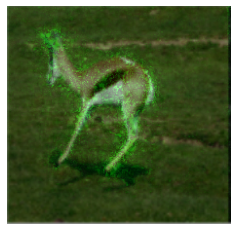

In [2]:
import interpretdl as it
from paddle.vision.models import resnet50
import paddle
device = 'gpu:2'
paddle.set_device(device)
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, device=device)
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

In [3]:
import numpy as np

evaluator = it.PointGame()
sg_var = np.sum(np.abs(exp), axis=(0,1))
r = evaluator.evaluate((20, 15, 155, 185), sg_var)

In [4]:
r

{'precision': 1.0,
 'recall': 0.05058823529411765,
 'f1_score': 0.09630449959818069,
 'auc_score': 0.8626159583578308,
 'ap_score': 0.8652619302721509}

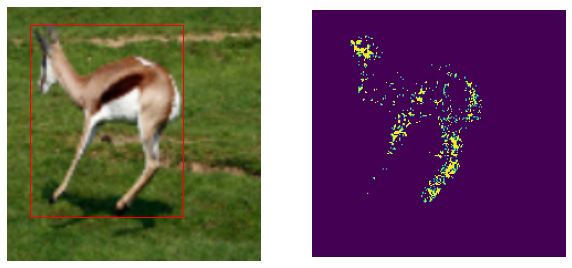

In [5]:
# SG

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from interpretdl.data_processor.readers import read_image

cols = 2
psize = 5
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
rect = patches.Rectangle((20, 15), 135, 170, linewidth=1, edgecolor='r', facecolor='none')

img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])

ax[0].axis('off')
ax[0].imshow(x)
ax[0].add_patch(rect)

ax[1].axis('off')
ax[1].imshow(sg_var > np.max(sg_var) * 0.25)

# LIME and Evaluation

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 129.48it/s]


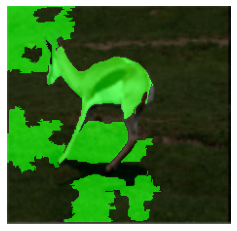

In [6]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, device=device)
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [7]:
from interpretdl.data_processor.visualizer import sp_to_array

label = list(lime_weights.keys())[0]
exp_array = sp_to_array(lime.lime_results['segmentation'], lime_weights[label])

evaluator = it.PointGame()
r = evaluator.evaluate((20, 15, 155, 185), exp_array)

In [8]:
r

{'precision': 0.7984864864864865,
 'recall': 0.16091503267973856,
 'f1_score': 0.26785103541101046,
 'auc_score': 0.6034934507073937,
 'ap_score': 0.6393394142424997}

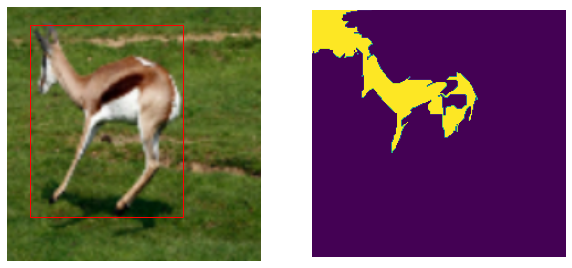

In [9]:
# LIME
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from interpretdl.data_processor.readers import read_image

cols = 2
psize = 5
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
rect = patches.Rectangle((20, 15), 135, 170, linewidth=1, edgecolor='r', facecolor='none')

img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])

ax[0].axis('off')
ax[0].imshow(x)
ax[0].add_patch(rect)

ax[1].axis('off')
ax[1].imshow(exp_array > np.max(exp_array) * 0.25)